In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import datetime
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import os
import cv2


In [5]:
X = []
y = []
for i in range(10):
    for d in os.listdir("../assets/{}".format(i)):
        t_img = cv2.imread("../assets/{}".format(i)+"/"+d)
        t_img = cv2.cvtColor(t_img,cv2.COLOR_BGR2GRAY)
        X.append(t_img)
        y.append(i)

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
display(X.shape)
y.shape

(3456, 28, 28)

(3456,)

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state= 21)

In [12]:
X_train.shape

(2764, 28, 28)

In [13]:
y_test

array([7, 9, 7, 5, 1, 2, 6, 5, 7, 5, 5, 9, 6, 8, 9, 8, 9, 8, 4, 3, 7, 7,
       8, 7, 4, 4, 2, 7, 4, 8, 5, 5, 6, 6, 4, 9, 9, 3, 4, 9, 5, 9, 7, 4,
       7, 9, 3, 2, 5, 4, 8, 5, 2, 4, 2, 9, 1, 7, 3, 3, 1, 7, 6, 4, 4, 1,
       1, 2, 9, 1, 9, 2, 2, 6, 9, 3, 3, 1, 2, 5, 4, 9, 2, 7, 6, 6, 8, 3,
       2, 8, 6, 5, 2, 1, 8, 2, 1, 8, 6, 1, 1, 1, 4, 5, 7, 5, 2, 8, 6, 3,
       8, 6, 5, 7, 1, 3, 2, 2, 6, 6, 2, 9, 7, 7, 9, 8, 5, 4, 4, 2, 3, 5,
       2, 8, 2, 1, 6, 2, 7, 2, 8, 2, 7, 3, 6, 7, 6, 2, 5, 2, 1, 9, 4, 1,
       3, 4, 8, 9, 8, 4, 6, 5, 3, 2, 4, 3, 9, 2, 4, 5, 3, 8, 5, 9, 9, 4,
       5, 1, 4, 1, 9, 2, 3, 5, 1, 1, 3, 1, 9, 4, 1, 8, 3, 7, 6, 8, 4, 4,
       3, 6, 5, 6, 5, 8, 5, 5, 6, 9, 8, 7, 5, 7, 2, 9, 4, 8, 2, 7, 9, 4,
       2, 5, 1, 8, 8, 5, 1, 5, 4, 5, 5, 6, 5, 7, 7, 4, 3, 9, 3, 4, 6, 1,
       3, 9, 7, 1, 7, 4, 9, 5, 5, 7, 4, 6, 3, 2, 4, 1, 8, 5, 4, 6, 3, 1,
       6, 3, 8, 3, 3, 7, 3, 5, 8, 3, 1, 1, 6, 6, 3, 7, 6, 6, 9, 1, 2, 5,
       6, 5, 7, 9, 7, 6, 8, 6, 2, 5, 4, 8, 2, 9, 5,

In [14]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
num_classes

10

In [16]:
def larger_model():
    # create model
	model = keras.Sequential(
    [
        Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(15, (3, 3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(50, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    

    # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [17]:
model = larger_model()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10,callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
277/277 [==============================] - 18s 65ms/step - loss: 1.9934 - accuracy: 0.2287 - val_loss: 1.5714 - val_accuracy: 0.4321
Epoch 2/10
277/277 [==============================] - 16s 59ms/step - loss: 1.0075 - accuracy: 0.6440 - val_loss: 0.5508 - val_accuracy: 0.8295
Epoch 3/10
277/277 [==============================] - 17s 63ms/step - loss: 0.5589 - accuracy: 0.8205 - val_loss: 0.3749 - val_accuracy: 0.8801
Epoch 4/10
277/277 [==============================] - 16s 58ms/step - loss: 0.3910 - accuracy: 0.8705 - val_loss: 0.3348 - val_accuracy: 0.8902
Epoch 5/10
277/277 [==============================] - 17s 61ms/step - loss: 0.2519 - accuracy: 0.9200 - val_loss: 0.2002 - val_accuracy: 0.9451
Epoch 6/10
277/277 [==============================] - 18s 67ms/step - loss: 0.2277 - accuracy: 0.9229 - val_loss: 0.1748 - val_accuracy: 0.9451
Epoch 7/10
277/277 [==============================] - 17s 60ms/step - loss: 0.1838 - accuracy: 0.9428 - val_loss: 0.1609 - val_accuracy:

In [19]:
scores

[0.09560658782720566, 0.9682080745697021]

In [20]:
pred = model.predict_classes(X_test,verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
22/22 [==============================] - 1s 30ms/step


In [21]:
pred

array([7, 9, 7, 5, 1, 2, 6, 5, 7, 5, 5, 9, 6, 8, 9, 8, 9, 8, 4, 3, 7, 2,
       8, 7, 4, 4, 2, 7, 4, 8, 5, 5, 6, 6, 4, 9, 9, 3, 4, 9, 5, 9, 7, 4,
       7, 9, 3, 2, 5, 4, 8, 5, 2, 4, 2, 9, 1, 7, 3, 3, 1, 7, 6, 4, 4, 1,
       1, 2, 9, 1, 9, 2, 2, 6, 9, 3, 3, 1, 2, 6, 4, 9, 2, 7, 6, 6, 8, 3,
       2, 8, 8, 5, 2, 1, 8, 2, 1, 8, 6, 1, 1, 1, 4, 8, 7, 5, 2, 8, 6, 3,
       8, 6, 5, 7, 1, 3, 2, 2, 6, 6, 2, 9, 7, 7, 9, 8, 5, 4, 4, 2, 3, 5,
       2, 8, 2, 1, 6, 2, 7, 2, 8, 2, 7, 3, 6, 7, 6, 2, 5, 2, 1, 9, 4, 1,
       3, 4, 8, 9, 8, 4, 6, 5, 3, 2, 4, 3, 9, 2, 4, 3, 3, 8, 5, 9, 1, 4,
       5, 1, 4, 1, 9, 2, 3, 5, 1, 1, 3, 1, 9, 4, 1, 8, 3, 7, 6, 8, 4, 4,
       3, 6, 5, 6, 5, 8, 5, 5, 6, 9, 8, 7, 5, 7, 2, 9, 4, 8, 2, 7, 9, 4,
       2, 5, 1, 8, 8, 5, 1, 5, 4, 5, 5, 6, 5, 7, 7, 4, 3, 9, 3, 4, 6, 1,
       3, 9, 7, 1, 7, 4, 9, 5, 5, 7, 4, 6, 3, 2, 4, 1, 8, 5, 4, 6, 3, 1,
       6, 3, 8, 3, 3, 7, 3, 5, 8, 3, 1, 1, 6, 6, 3, 7, 6, 6, 9, 1, 2, 5,
       6, 5, 7, 9, 7, 6, 5, 6, 2, 5, 4, 8, 2, 9, 5,

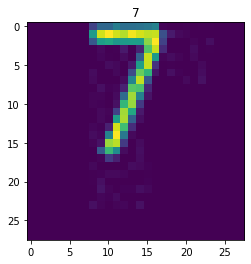

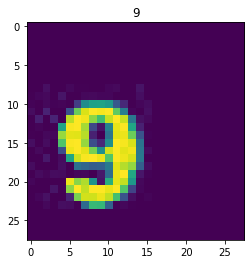

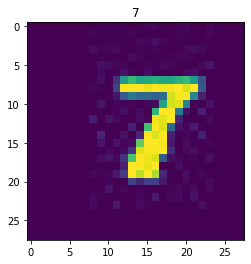

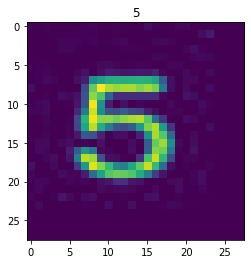

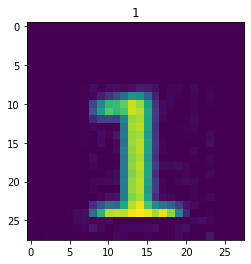

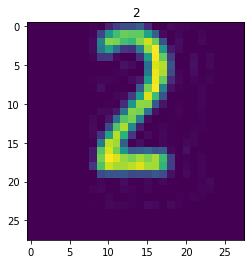

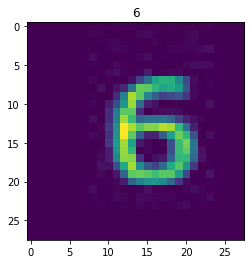

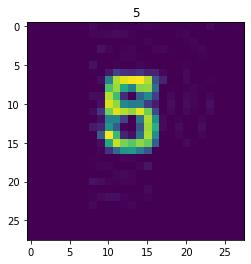

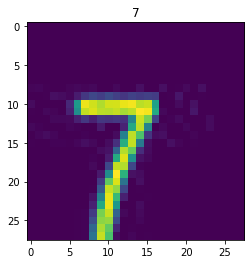

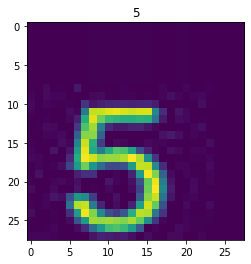

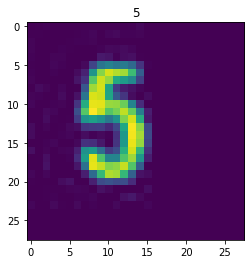

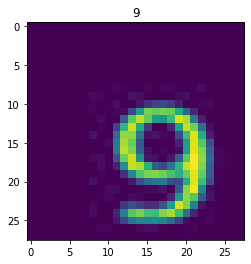

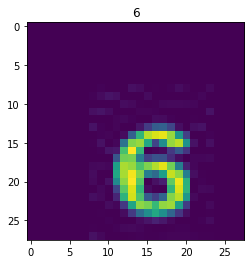

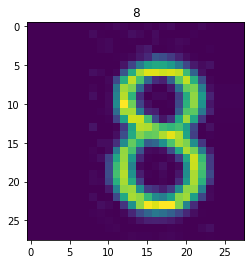

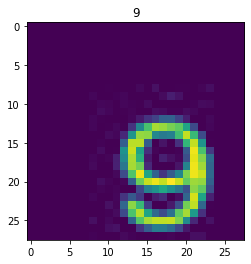

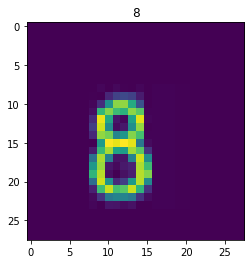

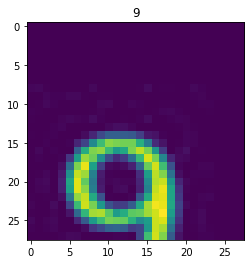

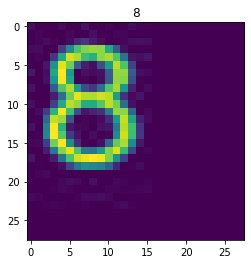

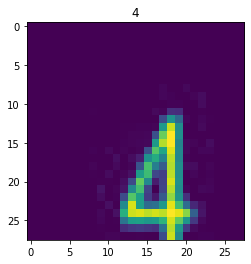

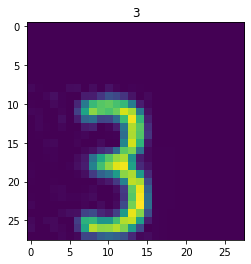

In [22]:
import matplotlib.pyplot as plt

for i in range(20):
    
    plt.imshow(X_test[i])
    plt.title(pred[i])
    plt.show()

In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [24]:
model.save("drecv2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drecv2/assets
